In [36]:
!pip install ccxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# { import the libraries
import ccxt
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# }

In [38]:
# { load exchange
exchange = ccxt.binance({
    'options': {
        'adjustForTimeDifference': True,
    },

})
# }

In [39]:
# { load data as function
def fetch(symbol: str, timeframe: str, limit: int):
    print(f"Fetching {symbol} new bars for {datetime.now().isoformat()}")

    bars = exchange.fetch_ohlcv(
        symbol, timeframe=timeframe, limit=limit)  # fetch ohlcv
    df = pd.DataFrame(bars[:-1], columns=['timestamp',
                      'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    #df = df.set_index(pd.DatetimeIndex(df.timestamp))
    return df
# }

In [40]:
# { set the symbol for data function
BTC = fetch('BTC/USDT', '8h', 900)
# }

BTC 

Fetching BTC/USDT new bars for 2022-07-24T12:15:28.784301


,timestamp,open,high,low,close,volume
0,2021-09-27 16:00:00,43293.27,43416.42,42098.00,42147.35,12692.94414
1,2021-09-28 00:00:00,42147.35,42787.38,41650.00,41775.25,12723.14477
2,2021-09-28 08:00:00,41777.79,42593.69,41278.49,41447.18,19260.95509
3,2021-09-28 16:00:00,41447.18,42017.33,40888.00,41026.54,11388.16254
4,2021-09-29 00:00:00,41025.01,42476.26,40753.88,42450.25,11416.43853
...,...,...,...,...,...,...
894,2022-07-22 16:00:00,23290.71,23344.62,22500.00,22684.83,52581.10806
895,2022-07-23 00:00:00,22684.83,23000.77,22550.14,22770.52,32762.18785
896,2022-07-23 08:00:00,22771.94,22877.26,22039.89,22215.61,51105.76453
897,2022-07-23 16:00:00,22216.90,22559.00,21934.57,22451.07,38269.82137


In [41]:
#{ function for calculate povit high
def PIVOTHIGH(data:str =BTC['high'] , left_bar:int =14 , right_bar:int=14):
  data_len=np.size(data)
  pivothigh=[]
  for i in range(data_len - right_bar) :
    pivothigh.append(np.nan) 
    pivot = True
    if i > left_bar:
      for x in range(left_bar +1):
        if data[i-x]> data[i]:
          pivot = False
      for x in range(right_bar +1):
        if data[i+x] > data[i]:
          pivot = False
    if pivot is True:
      pivothigh[np.size(pivothigh)-1]=data[i]
  for i in range(right_bar):
    pivothigh.append(np.nan)
  return np.round(pivothigh,2)



In [57]:
# { use pivothigh function 
BTC['pivothigh'] = PIVOTHIGH()

BTC['pivothigh'][:14] = np.nan

BTC['pivothighfill'] = BTC['pivothigh'].fillna(method='ffill')
# }


BTC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timestamp,open,high,low,close,volume,pivothigh,pivothighfill,pivotlow,pivotlowfill,atr,pivothigh_bool,slope_ph
0,2021-09-27 16:00:00,43293.27,43416.42,42098.00,42147.35,12692.94414,NaN,NaN,42098.00,42098.00,NaN,True,NaN
1,2021-09-28 00:00:00,42147.35,42787.38,41650.00,41775.25,12723.14477,NaN,NaN,41650.00,41650.00,NaN,True,NaN
2,2021-09-28 08:00:00,41777.79,42593.69,41278.49,41447.18,19260.95509,NaN,NaN,41278.49,41278.49,NaN,True,NaN
3,2021-09-28 16:00:00,41447.18,42017.33,40888.00,41026.54,11388.16254,NaN,NaN,40888.00,40888.00,NaN,True,NaN
4,2021-09-29 00:00:00,41025.01,42476.26,40753.88,42450.25,11416.43853,NaN,NaN,40753.88,40753.88,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-07-22 16:00:00,23290.71,23344.62,22500.00,22684.83,52581.10806,NaN,22527.37,NaN,21578.14,69.0,False,0.0
895,2022-07-23 00:00:00,22684.83,23000.77,22550.14,22770.52,32762.18785,NaN,22527.37,NaN,21578.14,66.0,False,0.0
896,2022-07-23 08:00:00,22771.94,22877.26,22039.89,22215.61,51105.76453,NaN,22527.37,NaN,21578.14,64.0,False,0.0
897,2022-07-23 16:00:00,22216.90,22559.00,21934.57,22451.07,38269.82137,NaN,22527.37,NaN,21578.14,60.0,False,0.0


In [58]:
# {  plot the data
fig = go.Figure()

fig.add_trace(go.Candlestick(x=BTC.index,
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close'],
                             showlegend=False))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['pivothighfill'],
                         opacity=0.7,
                         line=dict(color='green', width=2),
                         name='pivothighfill'))


fig.show()
# }

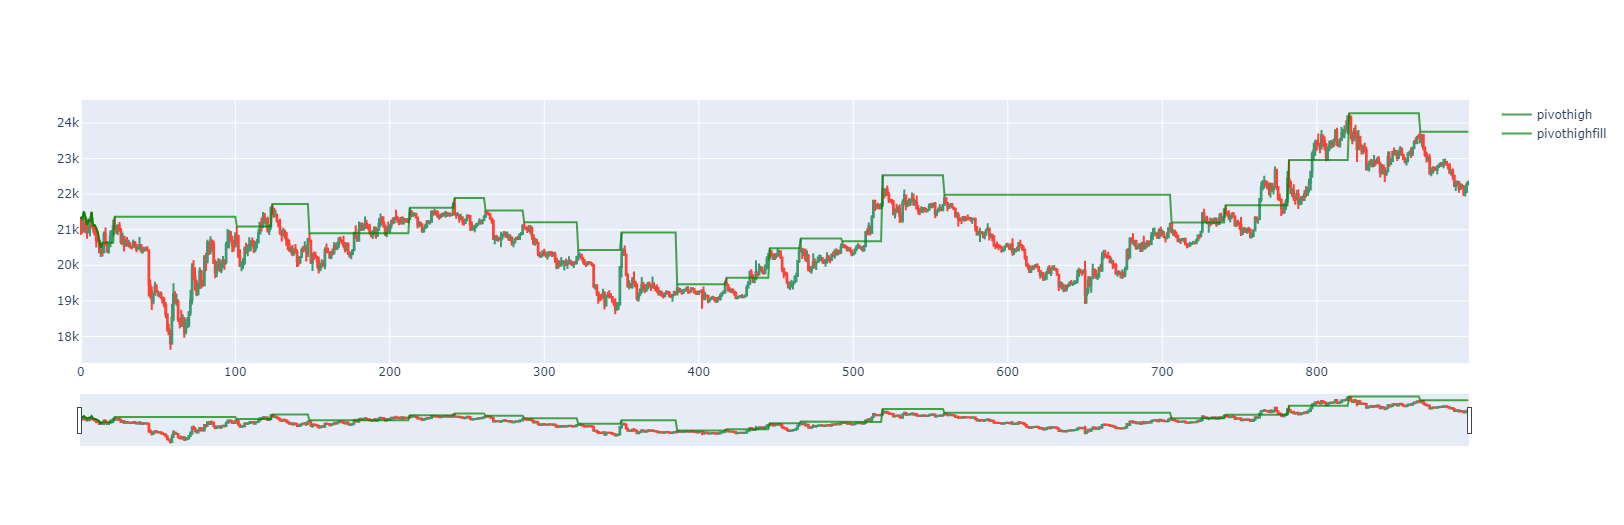

In [44]:
#{ function for calculate povit low
def PIVOTLOW(data:str =BTC['low'] , left_bar:int =14 , right_bar:int=14):
  data_len=np.size(data)
  pivotlow=[]
  for i in range(data_len - right_bar) :
    pivotlow.append(np.nan) 
    pivot = True
    if i > left_bar:
      for x in range(left_bar +1):
        if data[i-x] < data[i]:
          pivot = False
      for x in range(right_bar +1):
        if data[i+x] < data[i]:
          pivot = False
    if pivot is True:
      pivotlow[np.size(pivotlow)-1]=data[i]
  for i in range(right_bar):
    pivotlow.append(np.nan)
  return np.round(pivotlow,2)
#}

In [59]:
#{ use pivotlow function to calculate pivot low
BTC['pivotlow'] = PIVOTLOW()

BTC['pivotlow'][:14] = np.nan

BTC['pivotlowfill'] = BTC['pivotlow'].fillna(method='ffill')
# }

BTC
#}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timestamp,open,high,low,close,volume,pivothigh,pivothighfill,pivotlow,pivotlowfill,atr,pivothigh_bool,slope_ph
0,2021-09-27 16:00:00,43293.27,43416.42,42098.00,42147.35,12692.94414,NaN,NaN,NaN,NaN,NaN,True,NaN
1,2021-09-28 00:00:00,42147.35,42787.38,41650.00,41775.25,12723.14477,NaN,NaN,NaN,NaN,NaN,True,NaN
2,2021-09-28 08:00:00,41777.79,42593.69,41278.49,41447.18,19260.95509,NaN,NaN,NaN,NaN,NaN,True,NaN
3,2021-09-28 16:00:00,41447.18,42017.33,40888.00,41026.54,11388.16254,NaN,NaN,NaN,NaN,NaN,True,NaN
4,2021-09-29 00:00:00,41025.01,42476.26,40753.88,42450.25,11416.43853,NaN,NaN,NaN,NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-07-22 16:00:00,23290.71,23344.62,22500.00,22684.83,52581.10806,NaN,22527.37,NaN,18910.94,69.0,False,0.0
895,2022-07-23 00:00:00,22684.83,23000.77,22550.14,22770.52,32762.18785,NaN,22527.37,NaN,18910.94,66.0,False,0.0
896,2022-07-23 08:00:00,22771.94,22877.26,22039.89,22215.61,51105.76453,NaN,22527.37,NaN,18910.94,64.0,False,0.0
897,2022-07-23 16:00:00,22216.90,22559.00,21934.57,22451.07,38269.82137,NaN,22527.37,NaN,18910.94,60.0,False,0.0


In [60]:
# {  plot the data
fig = go.Figure()

fig.add_trace(go.Candlestick(x=BTC.index,
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close'],
                             showlegend=False))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['pivothighfill'],
                         opacity=0.7,
                         line=dict(color='green', width=2),
                         name='pivothighfill'))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['pivotlowfill'],
                         opacity=0.7,
                         line=dict(color='red', width=2),
                         name='pivotlowhfill'))

fig.show()
# }

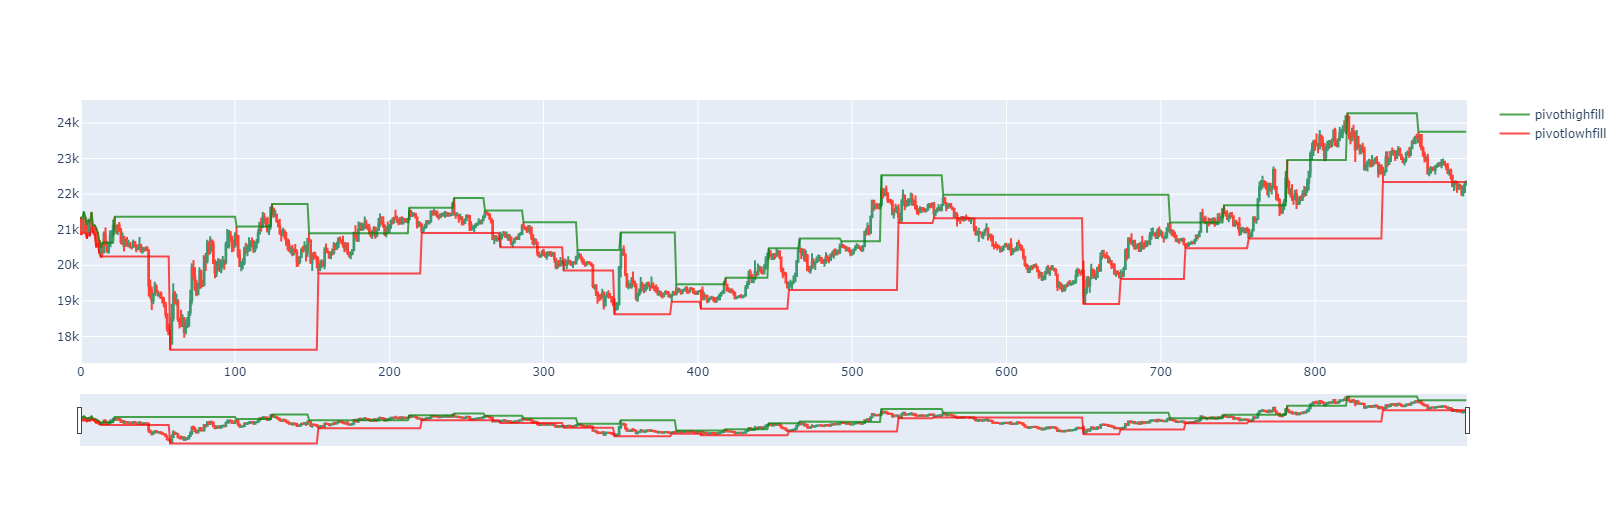

add slope with art/len*multy


In [61]:
# { ATR (averge true range)
def ATR(data:str = BTC , length: int = 14):
    h_l = data['high'] - data['low']
    h_pc = np.abs(data['high'] - data['close'].shift())
    low_pc = np.abs(data['low'] - data['close'].shift())
    tr = np.max(pd.concat([h_l, h_pc, low_pc], axis=1), axis=1)
    atr = tr.rolling(length).mean()

    return np.round(atr,2)
# ​}


In [62]:
# { use atr function and / len(pivot) * multy
multy = 1
BTC['atr'] = np.round(ATR()/14*multy)
# }

BTC

,timestamp,open,high,low,close,volume,pivothigh,pivothighfill,pivotlow,pivotlowfill,atr,pivothigh_bool,slope_ph
0,2021-09-27 16:00:00,43293.27,43416.42,42098.00,42147.35,12692.94414,NaN,NaN,NaN,NaN,NaN,True,NaN
1,2021-09-28 00:00:00,42147.35,42787.38,41650.00,41775.25,12723.14477,NaN,NaN,NaN,NaN,NaN,True,NaN
2,2021-09-28 08:00:00,41777.79,42593.69,41278.49,41447.18,19260.95509,NaN,NaN,NaN,NaN,NaN,True,NaN
3,2021-09-28 16:00:00,41447.18,42017.33,40888.00,41026.54,11388.16254,NaN,NaN,NaN,NaN,NaN,True,NaN
4,2021-09-29 00:00:00,41025.01,42476.26,40753.88,42450.25,11416.43853,NaN,NaN,NaN,NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-07-22 16:00:00,23290.71,23344.62,22500.00,22684.83,52581.10806,NaN,22527.37,NaN,18910.94,69.0,False,0.0
895,2022-07-23 00:00:00,22684.83,23000.77,22550.14,22770.52,32762.18785,NaN,22527.37,NaN,18910.94,66.0,False,0.0
896,2022-07-23 08:00:00,22771.94,22877.26,22039.89,22215.61,51105.76453,NaN,22527.37,NaN,18910.94,64.0,False,0.0
897,2022-07-23 16:00:00,22216.90,22559.00,21934.57,22451.07,38269.82137,NaN,22527.37,NaN,18910.94,60.0,False,0.0


In [64]:
# { return bool if condition is true for add slope
BTC['pivothigh_bool'] = np.where(
    BTC['pivothigh'] == BTC['high'], 'True', 'False')

BTC['pivotlow_bool'] = np.where(
    BTC['pivotlow'] == BTC['low'], 'True', 'False')
# }

BTC

,timestamp,open,high,low,close,volume,pivothigh,pivothighfill,pivotlow,pivotlowfill,atr,pivothigh_bool,slope_ph,pivotlow_bool
0,2021-09-27 16:00:00,43293.27,43416.42,42098.00,42147.35,12692.94414,NaN,NaN,NaN,NaN,NaN,False,NaN,False
1,2021-09-28 00:00:00,42147.35,42787.38,41650.00,41775.25,12723.14477,NaN,NaN,NaN,NaN,NaN,False,NaN,False
2,2021-09-28 08:00:00,41777.79,42593.69,41278.49,41447.18,19260.95509,NaN,NaN,NaN,NaN,NaN,False,NaN,False
3,2021-09-28 16:00:00,41447.18,42017.33,40888.00,41026.54,11388.16254,NaN,NaN,NaN,NaN,NaN,False,NaN,False
4,2021-09-29 00:00:00,41025.01,42476.26,40753.88,42450.25,11416.43853,NaN,NaN,NaN,NaN,NaN,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-07-22 16:00:00,23290.71,23344.62,22500.00,22684.83,52581.10806,NaN,22527.37,NaN,18910.94,69.0,False,0.0,False
895,2022-07-23 00:00:00,22684.83,23000.77,22550.14,22770.52,32762.18785,NaN,22527.37,NaN,18910.94,66.0,False,0.0,False
896,2022-07-23 08:00:00,22771.94,22877.26,22039.89,22215.61,51105.76453,NaN,22527.37,NaN,18910.94,64.0,False,0.0,False
897,2022-07-23 16:00:00,22216.90,22559.00,21934.57,22451.07,38269.82137,NaN,22527.37,NaN,18910.94,60.0,False,0.0,False


In [67]:
# { pivot high calclution
def SLOPE_PH(data: str, ATR: str, pivot: str, lenpivot: int = 14):
    slope = np.zeros(np.size(data))
    slope[:lenpivot] = np.nan
    for i in range(lenpivot, np.size(data), 1):
        if data[i] == 'True':
            atr = ATR[i]
            slope[i] = pivot[i]
        if data[i] == 'False':
            slope[i] = slope[i-1]-atr
    return np.round(slope)
# }

In [68]:
# { use slop functions to calcluate pivot slope
BTC['slope_ph'] = SLOPE_PH(BTC['pivothigh_bool'], BTC['atr'], BTC['pivothigh'])

BTC['slope_ph'] = np.where(BTC['pivothigh_bool'] ==
                           'True', np.NAN, BTC['slope_ph'])

BTC

,timestamp,open,high,low,close,volume,pivothigh,pivothighfill,pivotlow,pivotlowfill,atr,pivothigh_bool,slope_ph,pivotlow_bool
0,2021-09-27 16:00:00,43293.27,43416.42,42098.00,42147.35,12692.94414,NaN,NaN,NaN,NaN,NaN,False,NaN,False
1,2021-09-28 00:00:00,42147.35,42787.38,41650.00,41775.25,12723.14477,NaN,NaN,NaN,NaN,NaN,False,NaN,False
2,2021-09-28 08:00:00,41777.79,42593.69,41278.49,41447.18,19260.95509,NaN,NaN,NaN,NaN,NaN,False,NaN,False
3,2021-09-28 16:00:00,41447.18,42017.33,40888.00,41026.54,11388.16254,NaN,NaN,NaN,NaN,NaN,False,NaN,False
4,2021-09-29 00:00:00,41025.01,42476.26,40753.88,42450.25,11416.43853,NaN,NaN,NaN,NaN,NaN,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-07-22 16:00:00,23290.71,23344.62,22500.00,22684.83,52581.10806,NaN,22527.37,NaN,18910.94,69.0,False,20371.0,False
895,2022-07-23 00:00:00,22684.83,23000.77,22550.14,22770.52,32762.18785,NaN,22527.37,NaN,18910.94,66.0,False,20322.0,False
896,2022-07-23 08:00:00,22771.94,22877.26,22039.89,22215.61,51105.76453,NaN,22527.37,NaN,18910.94,64.0,False,20273.0,False
897,2022-07-23 16:00:00,22216.90,22559.00,21934.57,22451.07,38269.82137,NaN,22527.37,NaN,18910.94,60.0,False,20224.0,False


In [69]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=BTC.index,
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close'],
                             showlegend=False))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['slope_ph'],
                         opacity=0.7,
                         line=dict(color='green', width=2, dash='dot'),
                         name='pivothigh'))

fig.add_trace(go.Scatter(
    x=BTC.index,
    y=BTC['pivothigh'],
    mode="markers+text",
    name="Markers and Text",

    text=BTC['pivothigh'],
    textfont=dict(
        family="sans serif",
        size=15,
        color="green"
    ),
    textposition="top center"))

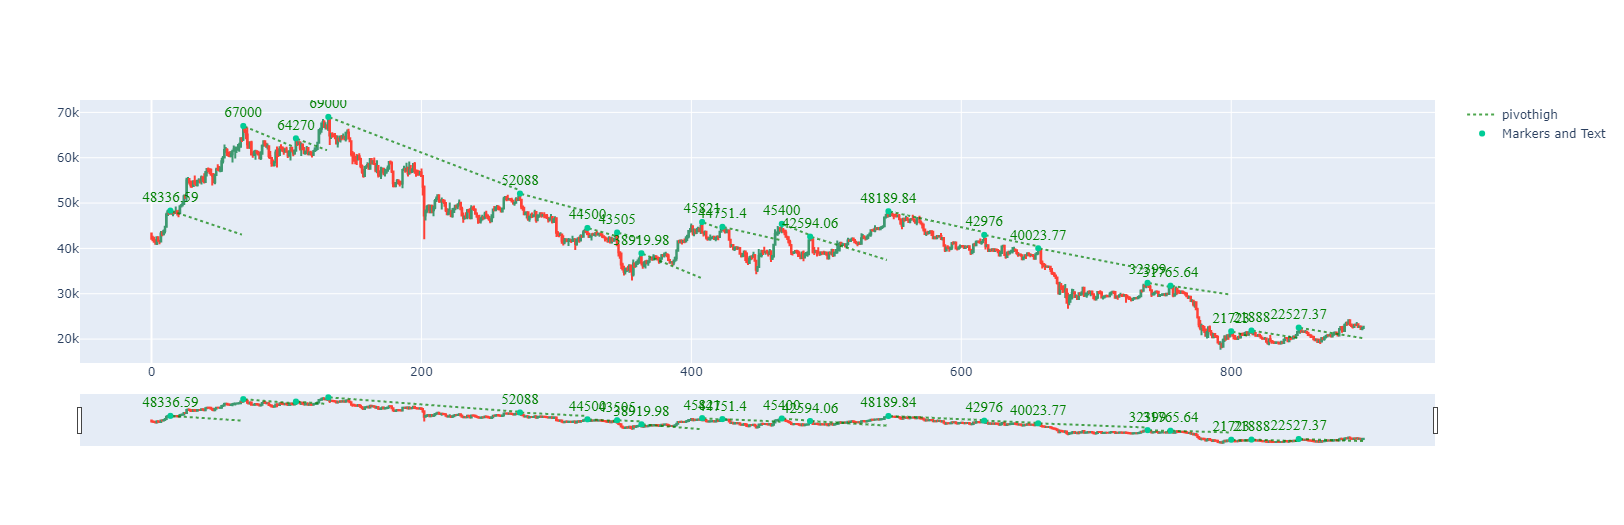

In [71]:
# { pivot low calclution
def SLOPE_PL(data: str, ATR: str, pivot: str, lenpivot: int = 14):
    slope = np.zeros(np.size(data))
    slope[:lenpivot] = np.nan
    for i in range(lenpivot, np.size(data), 1):
        if data[i] == 'True':
            atr = ATR[i]
            slope[i] = pivot[i]
        if data[i] == 'False':
            slope[i] = slope[i-1]+atr
    return np.round(slope)
# }

In [73]:
# { pivotlow
BTC['pivotlow'] = PIVOTLOW()

BTC['pivotlow'][:14] = np.nan

BTC['pivotlowfill'] = BTC['pivotlow'].fillna(method='ffill')
# }

BTC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timestamp,open,high,low,close,volume,pivothigh,pivothighfill,pivotlow,pivotlowfill,atr,pivothigh_bool,slope_ph,pivotlow_bool
0,2021-09-27 16:00:00,43293.27,43416.42,42098.00,42147.35,12692.94414,NaN,NaN,NaN,NaN,NaN,False,NaN,False
1,2021-09-28 00:00:00,42147.35,42787.38,41650.00,41775.25,12723.14477,NaN,NaN,NaN,NaN,NaN,False,NaN,False
2,2021-09-28 08:00:00,41777.79,42593.69,41278.49,41447.18,19260.95509,NaN,NaN,NaN,NaN,NaN,False,NaN,False
3,2021-09-28 16:00:00,41447.18,42017.33,40888.00,41026.54,11388.16254,NaN,NaN,NaN,NaN,NaN,False,NaN,False
4,2021-09-29 00:00:00,41025.01,42476.26,40753.88,42450.25,11416.43853,NaN,NaN,NaN,NaN,NaN,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-07-22 16:00:00,23290.71,23344.62,22500.00,22684.83,52581.10806,NaN,22527.37,NaN,18910.94,69.0,False,20371.0,False
895,2022-07-23 00:00:00,22684.83,23000.77,22550.14,22770.52,32762.18785,NaN,22527.37,NaN,18910.94,66.0,False,20322.0,False
896,2022-07-23 08:00:00,22771.94,22877.26,22039.89,22215.61,51105.76453,NaN,22527.37,NaN,18910.94,64.0,False,20273.0,False
897,2022-07-23 16:00:00,22216.90,22559.00,21934.57,22451.07,38269.82137,NaN,22527.37,NaN,18910.94,60.0,False,20224.0,False


In [75]:
# { use slop functions to calcluate pivot slope
BTC['slope_pl'] = SLOPE_PL(BTC['pivotlow_bool'], BTC['atr'], BTC['pivotlow'])

BTC['slope_pl'] = np.where(BTC['pivotlow_bool'] ==
                           'True', np.NAN, BTC['slope_pl'])
# }
BTC

,timestamp,open,high,low,close,volume,pivothigh,pivothighfill,pivotlow,pivotlowfill,atr,pivothigh_bool,slope_ph,pivotlow_bool,slope_pl
0,2021-09-27 16:00:00,43293.27,43416.42,42098.00,42147.35,12692.94414,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN
1,2021-09-28 00:00:00,42147.35,42787.38,41650.00,41775.25,12723.14477,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN
2,2021-09-28 08:00:00,41777.79,42593.69,41278.49,41447.18,19260.95509,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN
3,2021-09-28 16:00:00,41447.18,42017.33,40888.00,41026.54,11388.16254,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN
4,2021-09-29 00:00:00,41025.01,42476.26,40753.88,42450.25,11416.43853,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-07-22 16:00:00,23290.71,23344.62,22500.00,22684.83,52581.10806,NaN,22527.37,NaN,18910.94,69.0,False,20371.0,False,20087.0
895,2022-07-23 00:00:00,22684.83,23000.77,22550.14,22770.52,32762.18785,NaN,22527.37,NaN,18910.94,66.0,False,20322.0,False,20129.0
896,2022-07-23 08:00:00,22771.94,22877.26,22039.89,22215.61,51105.76453,NaN,22527.37,NaN,18910.94,64.0,False,20273.0,False,20171.0
897,2022-07-23 16:00:00,22216.90,22559.00,21934.57,22451.07,38269.82137,NaN,22527.37,NaN,18910.94,60.0,False,20224.0,False,20213.0


In [76]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=BTC.index,
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close'],
                             showlegend=False))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['slope_ph'],
                         opacity=0.7,
                         line=dict(color='green', width=2, dash='dot'),
                         name='pivothigh'))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['slope_pl'],
                         opacity=0.7,
                         line=dict(color='red', width=2, dash='dot'),
                         name='pivotlow'))


fig.add_trace(go.Scatter(
    x=BTC.index,
    y=BTC['pivotlow'],
    mode="markers+text",
    name="Markers and Text",

    text=BTC['pivotlow'],
    textfont=dict(
        family="sans serif",
        size=15,
        color="red"
    ),
    textposition="bottom center"))

fig.add_trace(go.Scatter(
    x=BTC.index,
    y=BTC['pivothigh'],
    mode="markers+text",
    name="Markers and Text",

    text=BTC['pivothigh'],
    textfont=dict(
        family="sans serif",
        size=15,
        color="green"
    ),
    textposition="top center"))

fig.show()
# }


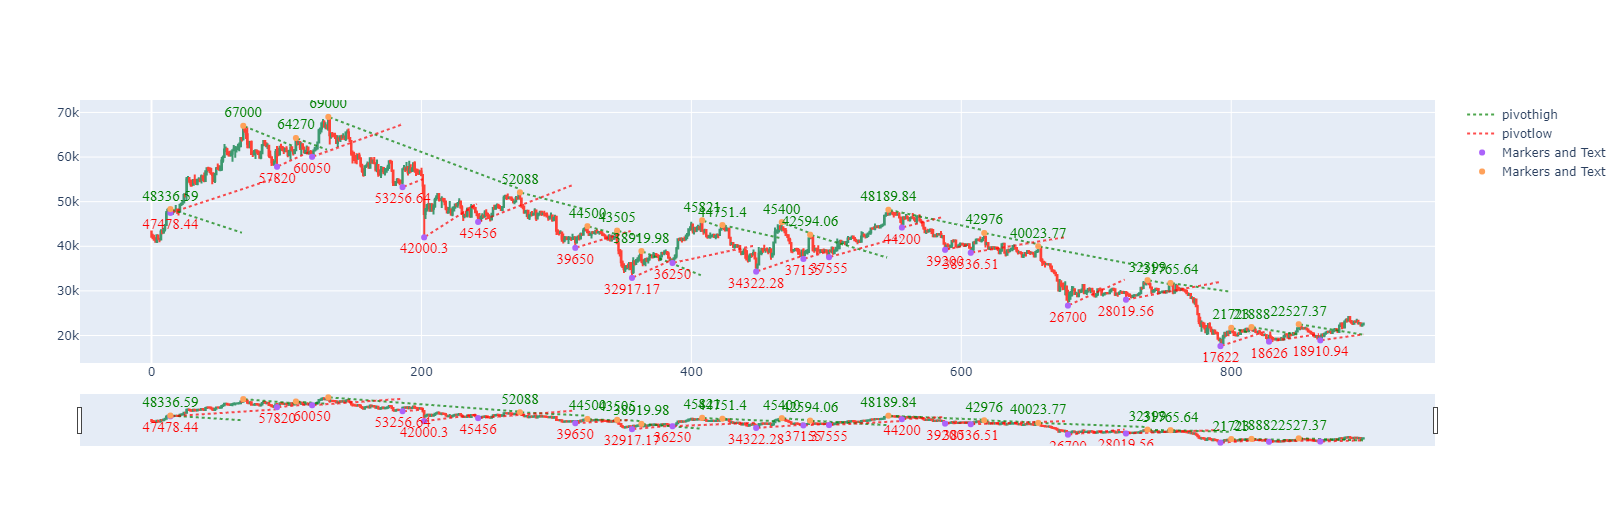